In [11]:
import os;
import matplotlib.pyplot as plt;
import numpy as np;
import pandas as pd;
import pathlib;
import matplotlib.image as mpimg;
import random

In [2]:
for dirpath,dirname,filename in os.walk("../input/yoga-pose-classification"):
    print(f"there are {len(dirname)} directories and {len(filename)} images in {dirpath}")

there are 1 directories and 0 images in ../input/yoga-pose-classification
there are 3 directories and 0 images in ../input/yoga-pose-classification/dataset
there are 2 directories and 0 images in ../input/yoga-pose-classification/dataset/final_test
there are 0 directories and 9 images in ../input/yoga-pose-classification/dataset/final_test/yoga_set1
there are 0 directories and 10 images in ../input/yoga-pose-classification/dataset/final_test/yoga_set2
there are 2 directories and 0 images in ../input/yoga-pose-classification/dataset/yoga_set1
there are 3 directories and 0 images in ../input/yoga-pose-classification/dataset/yoga_set1/test
there are 0 directories and 96 images in ../input/yoga-pose-classification/dataset/yoga_set1/test/downdog
there are 0 directories and 69 images in ../input/yoga-pose-classification/dataset/yoga_set1/test/tree
there are 0 directories and 5 images in ../input/yoga-pose-classification/dataset/yoga_set1/test/warrior1
there are 3 directories and 0 images in 

In [9]:
import pathlib;
data_dir=pathlib.Path("../input/yoga-pose-classification/dataset/yoga_set1/train/")
class_names=np.array(sorted(item.name for item in data_dir.glob("*")))
class_names

array(['downdog', 'tree', 'warrior1'], dtype='<U8')

In [13]:
def view_random_image(target_dir,target_class):
    target_folder=target_dir+target_class
    random_image=random.sample(os.listdir(target_folder),1)
    img=mpimg.imread(target_folder+"/"+random_image[0])
    plt.imshow(img)
    plt.axis(False)
    plt.title(target_class)
    print(f"the shape of the image is {img.shape}")

the shape of the image is (667, 1000, 3)


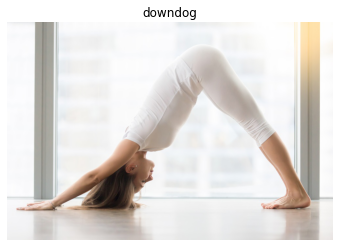

In [16]:
view_random_image("../input/yoga-pose-classification/dataset/yoga_set1/train/","downdog")

the shape of the image is (810, 1080, 3)


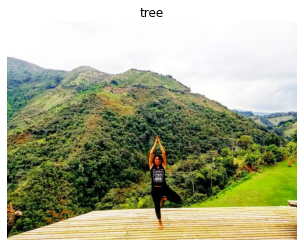

In [21]:
view_random_image("../input/yoga-pose-classification/dataset/yoga_set1/train/","tree")

the shape of the image is (1090, 1080, 3)


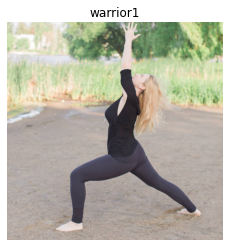

In [25]:
view_random_image("../input/yoga-pose-classification/dataset/yoga_set1/train/","warrior1")

In [45]:
from tensorflow.keras import mixed_precision;
mixed_precision.set_global_policy('mixed_float16')

2022-11-19 18:26:02.013312: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-19 18:26:02.015960: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [28]:
from keras.preprocessing.image import ImageDataGenerator;
train_dir1="../input/yoga-pose-classification/dataset/yoga_set1/train"
train_dir2="../input/yoga-pose-classification/dataset/yoga_set2/train"
test_dir1="../input/yoga-pose-classification/dataset/yoga_set1/test"
test_dir2="../input/yoga-pose-classification/dataset/yoga_set2/test"
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.4,vertical_flip=True,width_shift_range=0.2,height_shift_range=0.2,
                                rotation_range=0.2)
test_datagen=ImageDataGenerator(rescale=1./255)
train_data=train_datagen.flow_from_directory(directory=train_dir1,target_size=(224,224),class_mode='categorical',batch_size=16,seed=42)
test_data=train_datagen.flow_from_directory(directory=test_dir1,target_size=(224,224),class_mode='categorical',batch_size=16,seed=42)

Found 1184 images belonging to 3 classes.
Found 170 images belonging to 3 classes.


In [36]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [53]:
import tensorflow as tf;
tf.random.set_seed(42)
inputs=tf.keras.layers.Input(shape=(224,224,3))
x=tf.keras.applications.ResNet50V2(include_top=False)(inputs)
x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dense(1024,activation='relu')(x)
outputs=tf.keras.layers.Dense(len(class_names),activation="softmax")(x)
model_1=tf.keras.Model(inputs=inputs,outputs=outputs)

In [54]:
model_1.layers[1].trainable=False

In [55]:
for layer in model_1.layers:
    print(layer.trainable)

True
False
True
True
True


In [56]:
model_1.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
resnet50v2 (Functional)      (None, None, None, 2048)  23564800  
_________________________________________________________________
flatten_4 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_10 (Dense)             (None, 1024)              102761472 
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 3075      
Total params: 126,329,347
Trainable params: 102,764,547
Non-trainable params: 23,564,800
_________________________________________________________________


In [57]:
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
model_1.fit(train_data,epochs=10,validation_data=test_data)

Epoch 1/10
74/74 [==============================] - 49s 621ms/step - loss: 14.1278 - accuracy: 0.6824 - val_loss: 0.2421 - val_accuracy: 0.9294
Epoch 2/10
74/74 [==============================] - 45s 604ms/step - loss: 0.6120 - accuracy: 0.8590 - val_loss: 0.4251 - val_accuracy: 0.8706
Epoch 3/10
74/74 [==============================] - 44s 597ms/step - loss: 0.3900 - accuracy: 0.8758 - val_loss: 0.0599 - val_accuracy: 0.9765
Epoch 4/10
74/74 [==============================] - 45s 605ms/step - loss: 0.2911 - accuracy: 0.9037 - val_loss: 0.2921 - val_accuracy: 0.9059
Epoch 5/10
74/74 [==============================] - 44s 599ms/step - loss: 0.2885 - accuracy: 0.9046 - val_loss: 0.1369 - val_accuracy: 0.9529
Epoch 6/10
74/74 [==============================] - 44s 599ms/step - loss: 0.2228 - accuracy: 0.9307 - val_loss: 0.0951 - val_accuracy: 0.9647
Epoch 7/10
74/74 [==============================] - 44s 595ms/step - loss: 0.2838 - accuracy: 0.9037 - val_loss: 0.0604 - val_accuracy: 0.982

In [64]:
def load_and_prep(filename):
    image=tf.io.read_file(filename)
    image=tf.image.decode_image(image)
    image=tf.image.resize(image,size=[224,224])
    image=image/255.
    return image
def pred_and_plot(model,filename,class_name=class_names):
    image=load_and_prep(filename)
    pred=model.predict(tf.expand_dims(image,axis=0))
    if len(pred[0])>1:
        pred_class=class_name[np.argmax(pred[0])]
    else:
        pred_class=class_name[int(tf.round(pred[0]))]
    plt.axis(False)
    plt.imshow(image)
    plt.title(f"Predicted Class:{pred_class}")
    

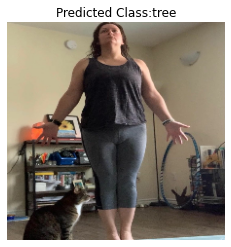

In [69]:
pred_and_plot(model_1,"../input/yoga-pose-classification/dataset/final_test/yoga_set2/10.jpg")

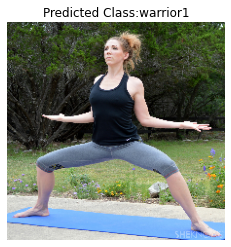

In [70]:
pred_and_plot(model_1,"../input/yoga-pose-classification/dataset/final_test/yoga_set2/6.jpg")

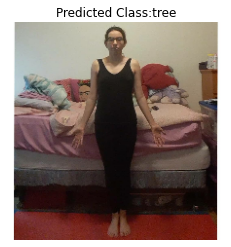

In [71]:
pred_and_plot(model_1,"../input/yoga-pose-classification/dataset/final_test/yoga_set2/9.jpg")

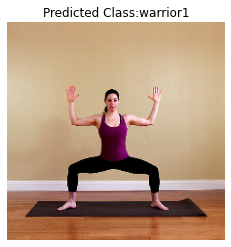

In [72]:
pred_and_plot(model_1,"../input/yoga-pose-classification/dataset/final_test/yoga_set2/1.jpg")

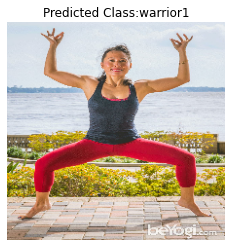

In [73]:
pred_and_plot(model_1,"../input/yoga-pose-classification/dataset/final_test/yoga_set2/5.jpg")

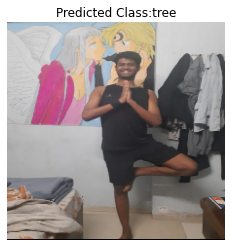

In [74]:
pred_and_plot(model_1,"../input/yoga-pose-classification/dataset/final_test/yoga_set1/11.jpg")

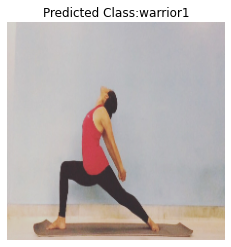

In [76]:
pred_and_plot(model_1,"../input/yoga-pose-classification/dataset/final_test/yoga_set1/8.jpg")

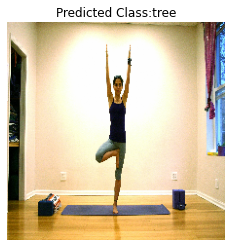

In [77]:
pred_and_plot(model_1,"../input/yoga-pose-classification/dataset/final_test/yoga_set1/5.jpg")